In [14]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")

import json
from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", None)

**Descripción del Dataset**
Este conjunto de datos contiene información sobre propiedades en alquiler en Madrid. A continuación, se detalla la estructura y contenido de las columnas:

***Columnas principales***

- propertyCode: Código único que identifica cada propiedad.

- price: Precio de la propiedad en euros (variable objetivo).

- propertyType: Tipo de propiedad (e.g., piso, ático, chalet, etc.).

- size: Tamaño de la propiedad en metros cuadrados.

- rooms: Número de habitaciones.

- bathrooms: Número de baños.

- district: Distrito donde se encuentra la propiedad (e.g., Centro, Hortaleza).

- neighborhood: Barrio dentro del distrito (datos menos completos que el distrito).

- latitude y longitude: Coordenadas geográficas de la propiedad.

- address: Dirección aproximada o descriptiva de la propiedad.

***Atributos adicionales***

- numPhotos: Número de fotos disponibles de la propiedad.

- exterior: Indicador booleano que muestra si la propiedad es exterior (True o False).

- hasLift: Indica si la propiedad tiene ascensor (True o False, con algunos valores nulos).

- parkingSpace: Información sobre espacio de estacionamiento (detallada en formato JSON en algunas filas).

- priceByArea: Precio por metro cuadrado en euros.

- floor: Piso en el que se encuentra la propiedad (e.g., bajo, 1, ático).

- description: Descripción textual de la propiedad.

***Columnas de características del anuncio***

- hasVideo: Indica si el anuncio incluye un video (True o False).

- has3DTour: Indica si el anuncio tiene un tour 3D disponible.

- newDevelopment: Booleano que indica si la propiedad es una nueva construcción.

- superTopHighlight y topNewDevelopment: Indicadores booleanos de la importancia o destaque del anuncio en la plataforma.

***Características menos completas***

- neighborhood y district: Aunque importantes, contienen valores nulos y pueden necesitar limpieza.

- parkingSpace y labels: Información limitada a unas pocas propiedades.

- newDevelopmentFinished: Solo incluye datos en propiedades específicas, con baja representación.

Nota: El dataset tiene 40 columnas en total. Antes de construir el modelo, es importante realizar una limpieza y selección de características relevantes.

## EDA 
  
  
  
#### Duplicados  
- Dado que se ha comprobado que hay casas duplicadas se opta por su eliminación  
  
#### Datos relevantes  
- Las columnas que se eliminan se eliminan por falta de relebancia a la hora de predecir el precio del alquiler en Madrid (ya sea por setido común o por otros casos como la baja representación de por ejemplo NewDevelopmentFinished)  
  
- Decido separar las viviendas de más de 150 m cuadrados del resto de viviendas  
  
#### Nulos  
- En todas las variables categóricas se creó una nueva categoría "desconocido" donde agruparlos.
  
#### Formateos  
- Variables como provincias he creado un grupo para todas las provincias que no son Madrid 
- He pasado rooms y bathrooms a categóricas (entre otras variables)
   

## Identificar variables independientes relevantes y dependiente (price) (LIMPIEZA INICIAL)

In [15]:
df_crudo=pd.read_csv("../../datos/datos4/api_rent_madrid.csv", sep= ";")


In [16]:
f.exploracion_dataframe(df_crudo, "price")

El número de datos es 450 y el de columnas es 38

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 8

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
description,0.22
hasVideo,4.00
status,4.00
newDevelopment,4.00
priceByArea,4.00
detailedType,4.00
suggestedTexts,4.00
hasPlan,4.00
has3DTour,4.00
has360,4.00



 ..................... 

Los tipos de las columnas son:


,tipo_dato
propertyCode,int64
numPhotos,int64
price,float64
propertyType,object
operation,object
size,float64
exterior,bool
rooms,int64
bathrooms,int64
address,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROPERTYTYPE tiene las siguientes valore únicos:


,count
propertyType,
flat,356
studio,48
duplex,19
penthouse,16
chalet,9


La columna OPERATION tiene las siguientes valore únicos:


,count
operation,
rent,450


La columna ADDRESS tiene las siguientes valore únicos:


,count
address,
"Calle Valle de Ambles, 2",10
El Quiñón,4
Calle de Sáhara,3
Calle de Honduras,3
Val,2


La columna PROVINCE tiene las siguientes valore únicos:


,count
province,
Madrid,358
Toledo,62
Guadalajara,21
Segovia,8
Ávila,1


La columna MUNICIPALITY tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,23
Torrejón de Ardoz,14
Seseña,14
Parla,14


La columna COUNTRY tiene las siguientes valore únicos:


,count
country,
es,450


La columna LATITUDE tiene las siguientes valore únicos:


,count
latitude,
404.430.651,10
403.809.876,2
40.009.603,2
402.003.307,2
401.969.978,2


La columna LONGITUDE tiene las siguientes valore únicos:


,count
longitude,
-34.659.877,10
-36.338.528,2
-39.515.398,2
-36.919.489,2
-36.896.474,2


La columna DESCRIPTION tiene las siguientes valore únicos:


,count
description,
"VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar con Qube! Alquila tu nueva casa en Torrejón de Ardoz SIN GASTOS DE AGENCIA, NI COMISIONES. Qube Torrejón es un residencial de obra nueva ubicado en Torrejón de Ardoz compuesto por 36 viviendas de Protección de Precio Limitado. Todas las viviendas cuentan con 2 dormitorios, 2 baños, trastero y 1 o 2 plazas de garaje incluido en el precio. El Precio NO incluye los gastos de comunidad, tasas e impuestos vinculados a la vivienda. El edificio cuenta con ascensor, servicio de conserjería, zonas comunes con piscina en mancomunidad, zona chill out en cubierta y sala gastrobar para que toda la familia pueda disfrutar de todas las comodidades que presentan las comunidades Qube. Las viviendas Qube llevan suelo radiante refrescante centralizado mediante aerotermia. Además, cuentan con la mayor calificación energética A con lo que se reduce el consumo energético y lo podrás comprobar en la factura de los consumos. Todos los pisos tienen cocina amueblada equipada con vitrocerámica de inducción, campana decorativa y horno. Los cuartos de baño cuentan con ducha y bañera, mampara, accesorios de baño, espejo y mueble. El resto de la vivienda no está amueblado. Además, las viviendas están dotadas de luminarias en la totalidad de las estancias. ¿Qué necesitas para poder disfrutar de una vivienda Qube? 1 mes de fianza Seguro de hogar a la firma de contrato. Contrato indefinido de más de 1 año de antigüedad. Si no cumples con esta condición se requerirá un avalista adicional. ¡IMPORTANTE! Qube Torrejón es una promoción de “Protección de Precio Limitado en Régimen de Alquiler”, por el decreto 74/2009, podrás optar por el piso que más te guste si cumples los requisitos de acceso de la Comunidad de Madrid, incluido uno de los disponibles adaptado para personas con movilidad que presenten su certificado de discapacidad. Si tienes cualquier duda acerca de las condiciones puedes visitar nuestra web o llamarnos, te responderemos encantados.",10
"Características de la vivienda: urbanización privada con piscina y área infantil. Vivienda completamente exterior 2 dormitorios y 2 baños. Cocina semianueblada (horno Bosch, vitrocerámica, campana extractora y microondas integrado). Tendedero cubierto. Salón 24 m2, habitación secundaria de 11 m2 y habitación principal de 14 m2. Baños completamente amueblados y equipados. Se incluye trastero y plaza de parking. Doble ventana en toda la vivienda. Puertos usb de recarga de aparatos electrónicos en todas las estancias de la casa. Aire acondicionado en salón marca Daikin. Paredes lisas. No se admiten mascotas.",2
"piso azul inmobiliaria alquila en calypo fado, precioso piso sin amueblar, no se admiten mascotas, piso de 70m2 compuesto de 2 dormitorios 1 solo baño completo, salon con salida a una estupenda terraza, aire acondicionado en el salon resto de la vivienda calefacion electrica, no ascensor, disponible ya, llama y ven a visitarlo telef 630189013 piso azul inmobiliaria.",2
"Vivienda adaptada. Certificado 33% de minusvalía. A estrenar con terraza, sin gastos de agencia, ni comisiones y con tu mascota. Reciente construcción de Protección Pública, 1 dormitorios con 1 baños y plaza de garaje. Cuenta con todas las comodidades, aire acondicionado, calefacción, baño equipado, cocina amueblada y equipada con horno, vitrocerámica, campana, terraza y de cuidado diseño y distribución adaptada a cualquier minusvalía según normativa. Alquila tu hogar con Alkira Living. Hemos hecho viviendas pensando en personas que buscan crear un hogar lleno de emociones y energía. Además, nos encantan las mascotas y queremos ayudarte a darles el espacio que merecen. Es un edificio altamente sostenible que combina un diseño moderno y minimalista, con elementos originales. Integra ascensor en unas amplias zonas de paso, conserjería, sistema de vigilancia 24 horas y zonas comunes al aire libre con parque infantil y piscina. Las instalaciones y los servicios del edificio son respe

La columna HASVIDEO tiene las siguientes valore únicos:


,count
hasVideo,
False,314
True,118


La columna STATUS tiene las siguientes valore únicos:


,count
status,
good,413
newdevelopment,17
renew,2


La columna NEWDEVELOPMENT tiene las siguientes valore únicos:


,count
newDevelopment,
False,415
True,17


La columna DETAILEDTYPE tiene las siguientes valore únicos:


,count
detailedType,
{'typology': 'flat'},344
"{'typology': 'flat', 'subTypology': 'studio'}",46
"{'typology': 'flat', 'subTypology': 'penthouse'}",16
"{'typology': 'flat', 'subTypology': 'duplex'}",15
"{'typology': 'chalet', 'subTypology': 'terracedHouse'}",5


La columna SUGGESTEDTEXTS tiene las siguientes valore únicos:


,count
suggestedTexts,
"{'subtitle': 'Suroeste, Torrejón de Ardoz', 'title': 'Piso en Calle Valle de Ambles, 2'}",10
"{'subtitle': 'El Quiñón, Seseña', 'title': 'Piso'}",4
"{'subtitle': 'Los Rosales, Madrid', 'title': 'Piso en Calle de Sáhara'}",3
"{'subtitle': 'Las Sedas - El Olivar, Alcalá de Henares', 'title': 'Piso en Calle de Honduras'}",3
"{'subtitle': 'Villa del Prado', 'title': 'Ático en Calle Hortensia'}",2


La columna HASPLAN tiene las siguientes valore únicos:


,count
hasPlan,
False,296
True,136


La columna HAS3DTOUR tiene las siguientes valore únicos:


,count
has3DTour,
False,426
True,6


La columna HAS360 tiene las siguientes valore únicos:


,count
has360,
False,345
True,87


La columna HASSTAGING tiene las siguientes valore únicos:


,count
hasStaging,
False,432


La columna SUPERTOPHIGHLIGHT tiene las siguientes valore únicos:


,count
superTopHighlight,
False,432


La columna TOPNEWDEVELOPMENT tiene las siguientes valore únicos:


,count
topNewDevelopment,
False,432


La columna EXTERNALREFERENCE tiene las siguientes valore únicos:


,count
externalReference,
CG-91792-0001,2
"3,80811E+11",2
6012-VI-011-008-000-003,2
5421,2
Pisoalquileragatha,2


La columna FLOOR tiene las siguientes valore únicos:


,count
floor,
1,95
2,77
bj,68
3,60
4,36


La columna DISTRICT tiene las siguientes valore únicos:


,count
district,
Centro,48
Villaverde,23
Puente de Vallecas,17
El Quiñón,13
Tetuán,13


La columna NEIGHBORHOOD tiene las siguientes valore únicos:


,count
neighborhood,
Lavapiés-Embajadores,11
Villaverde Alto,9
San Diego,8
Valdeacederas,8
Los Rosales,7


La columna HASLIFT tiene las siguientes valore únicos:


,count
hasLift,
True,234
False,185


La columna PARKINGSPACE tiene las siguientes valore únicos:


,count
parkingSpace,
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",136
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",1


La columna LABELS tiene las siguientes valore únicos:


,count
labels,
"[{'name': 'apartamentoType', 'text': 'Apartamento'}]",30


La columna NEWDEVELOPMENTFINISHED tiene las siguientes valore únicos:


,count
newDevelopmentFinished,
True,12
False,5


In [17]:
pd.options.display.float_format = "{:,.2f}".format 
df_crudo.describe().T

,count,mean,std,min,25%,50%,75%,max
propertyCode,450.00,"94,635,146.39","13,858,169.73","666,696.00","97,564,945.50","98,660,320.50","98,894,324.25","98,939,685.00"
numPhotos,450.00,21.90,9.67,0.00,15.00,21.00,28.00,72.00
price,450.00,671.80,85.10,340.00,640.00,700.00,740.00,750.00
size,450.00,68.24,35.66,20.00,47.25,62.00,80.00,371.00
rooms,450.00,1.70,0.97,0.00,1.00,2.00,2.00,6.00
bathrooms,450.00,1.21,0.44,1.00,1.00,1.00,1.00,3.00
distance,450.00,"22,455.77","17,001.69",183.00,"7,104.25","20,294.00","34,979.75","59,919.00"
priceByArea,432.00,11.86,5.36,1.00,8.00,11.00,15.00,33.00


### *Duplicados*

In [18]:
df_crudo[df_crudo["propertyCode"]== 98068981]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
245,98068981,19,692.00,flat,rent,83.00,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.00,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT02,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
253,98068981,19,692.00,flat,rent,83.00,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.00,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT02,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True


In [19]:
df_crudo.drop_duplicates(inplace=True)

In [20]:
df_crudo.duplicated().sum()

0

### Eliminación de columnas irrelevantes

In [21]:
df_crudo.head(3)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.00,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.00,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.00,flat,rent,70.00,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.00,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN


In [22]:
df_crudo=df_crudo[df_crudo["province"]== "Madrid"]

In [23]:
df_crudo.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

In [24]:
lista_eliminar=['propertyCode','numPhotos','description', 'hasVideo','hasPlan','has3DTour','has360','hasStaging','superTopHighlight', 'topNewDevelopment','suggestedTexts','externalReference','labels','operation', 'address', 'country', 'latitude', 'longitude', 'newDevelopmentFinished', 'showAddress','detailedType','priceByArea','neighborhood','newDevelopment', 'province','parkingSpace']

In [25]:
df_crudo.drop(columns=lista_eliminar, inplace=True)
df_crudo.reset_index(drop=True, inplace=True)

In [26]:
df_crudo.sample(2)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,district,hasLift
24,680.00,flat,38.00,False,1,1,Madrid,2591,good,1,Retiro,True
127,730.00,flat,50.00,True,1,1,Rivas-Vaciamadrid,16410,good,NaN,Rivas Futura,True


### Transformación de ciertas variables

### Nulos

In [27]:
df_crudo.isna().sum()

price            0
propertyType     0
size             0
exterior         0
rooms            0
bathrooms        0
municipality     0
distance         0
status          14
floor           63
district        52
hasLift         18
dtype: int64

status, hasLift, newDevelopment, district, floor (exterior, rooms, bathrooms, hasLift)

In [28]:
df_crudo["hasLift"]=df_crudo["hasLift"].fillna("desconocido")
df_crudo["status"]=df_crudo["status"].fillna("desconocido")
df_crudo["district"]=df_crudo["district"].fillna("desconocido")
df_crudo["floor"]=df_crudo["floor"].fillna("desconocido")

In [29]:
df_crudo['hasLift'] = df_crudo['hasLift'].astype('O')
df_crudo['exterior'] = df_crudo['exterior'].astype('O')
df_crudo['rooms'] = df_crudo['rooms'].astype('O')
df_crudo['bathrooms'] = df_crudo['bathrooms'].astype('O')

In [30]:
df_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         353 non-null    float64
 1   propertyType  353 non-null    object 
 2   size          353 non-null    float64
 3   exterior      353 non-null    object 
 4   rooms         353 non-null    object 
 5   bathrooms     353 non-null    object 
 6   municipality  353 non-null    object 
 7   distance      353 non-null    int64  
 8   status        353 non-null    object 
 9   floor         353 non-null    object 
 10  district      353 non-null    object 
 11  hasLift       353 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 33.2+ KB


In [31]:
df_crudo["floor"].unique()

array(['3', 'bj', '2', 'desconocido', '1', '5', 'en', '4', 'st', '8', '7',
       '6', '14', 'ss'], dtype=object)

In [32]:
df_crudo.isna().sum()

price           0
propertyType    0
size            0
exterior        0
rooms           0
bathrooms       0
municipality    0
distance        0
status          0
floor           0
district        0
hasLift         0
dtype: int64

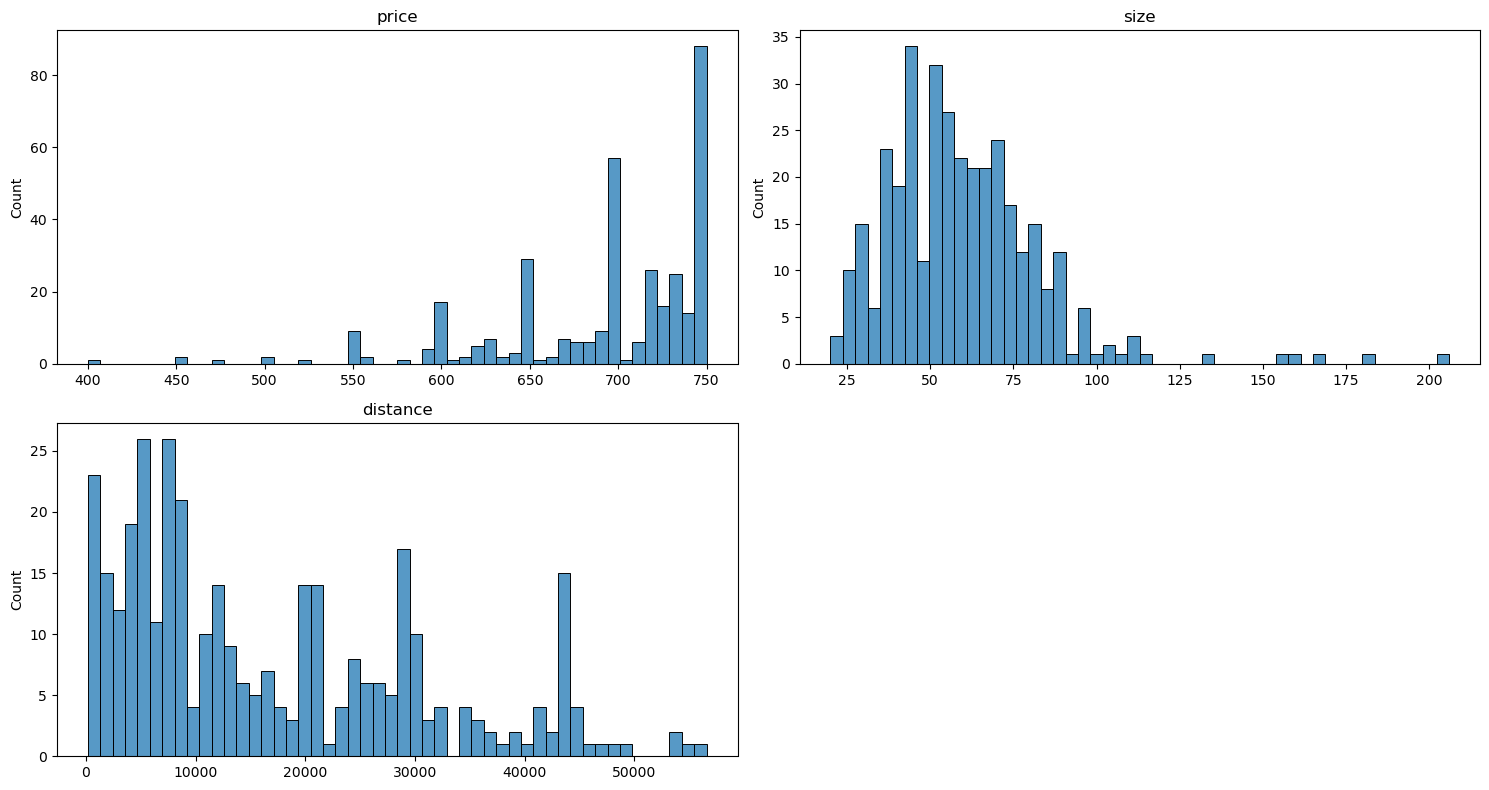

In [33]:
df_numericas, df_categoricas=f.separar_dataframe(df_crudo)
f.plot_numericas(df_numericas, (15,8))

Observamos las distribuciones de las variables numéricas

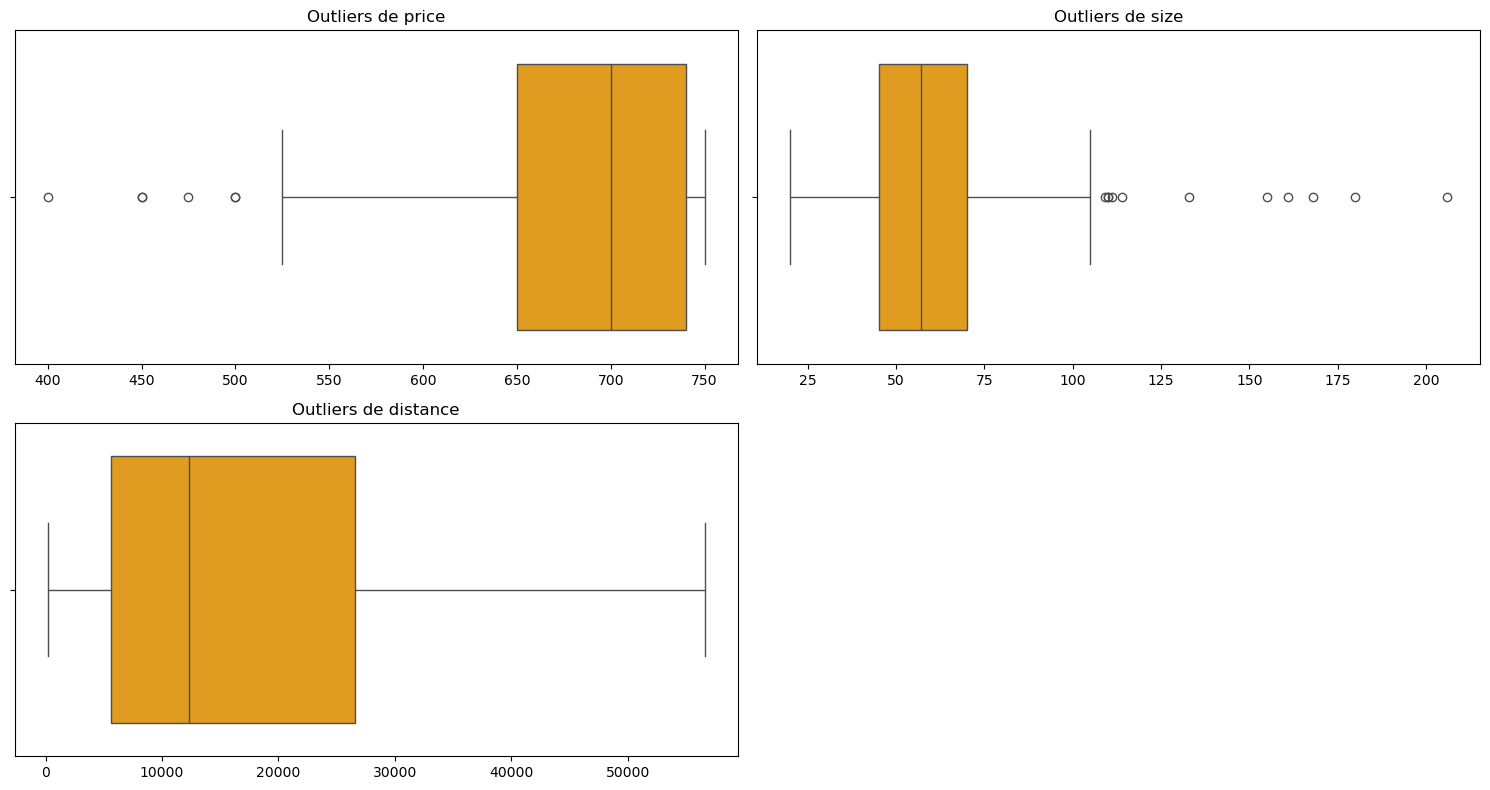

In [34]:
f.detectar_outliers(df_crudo)

Tienen sentido estos outliers en precio y size con lo que no voy a limitar ni eliminarlos

Ahora con las categóricas

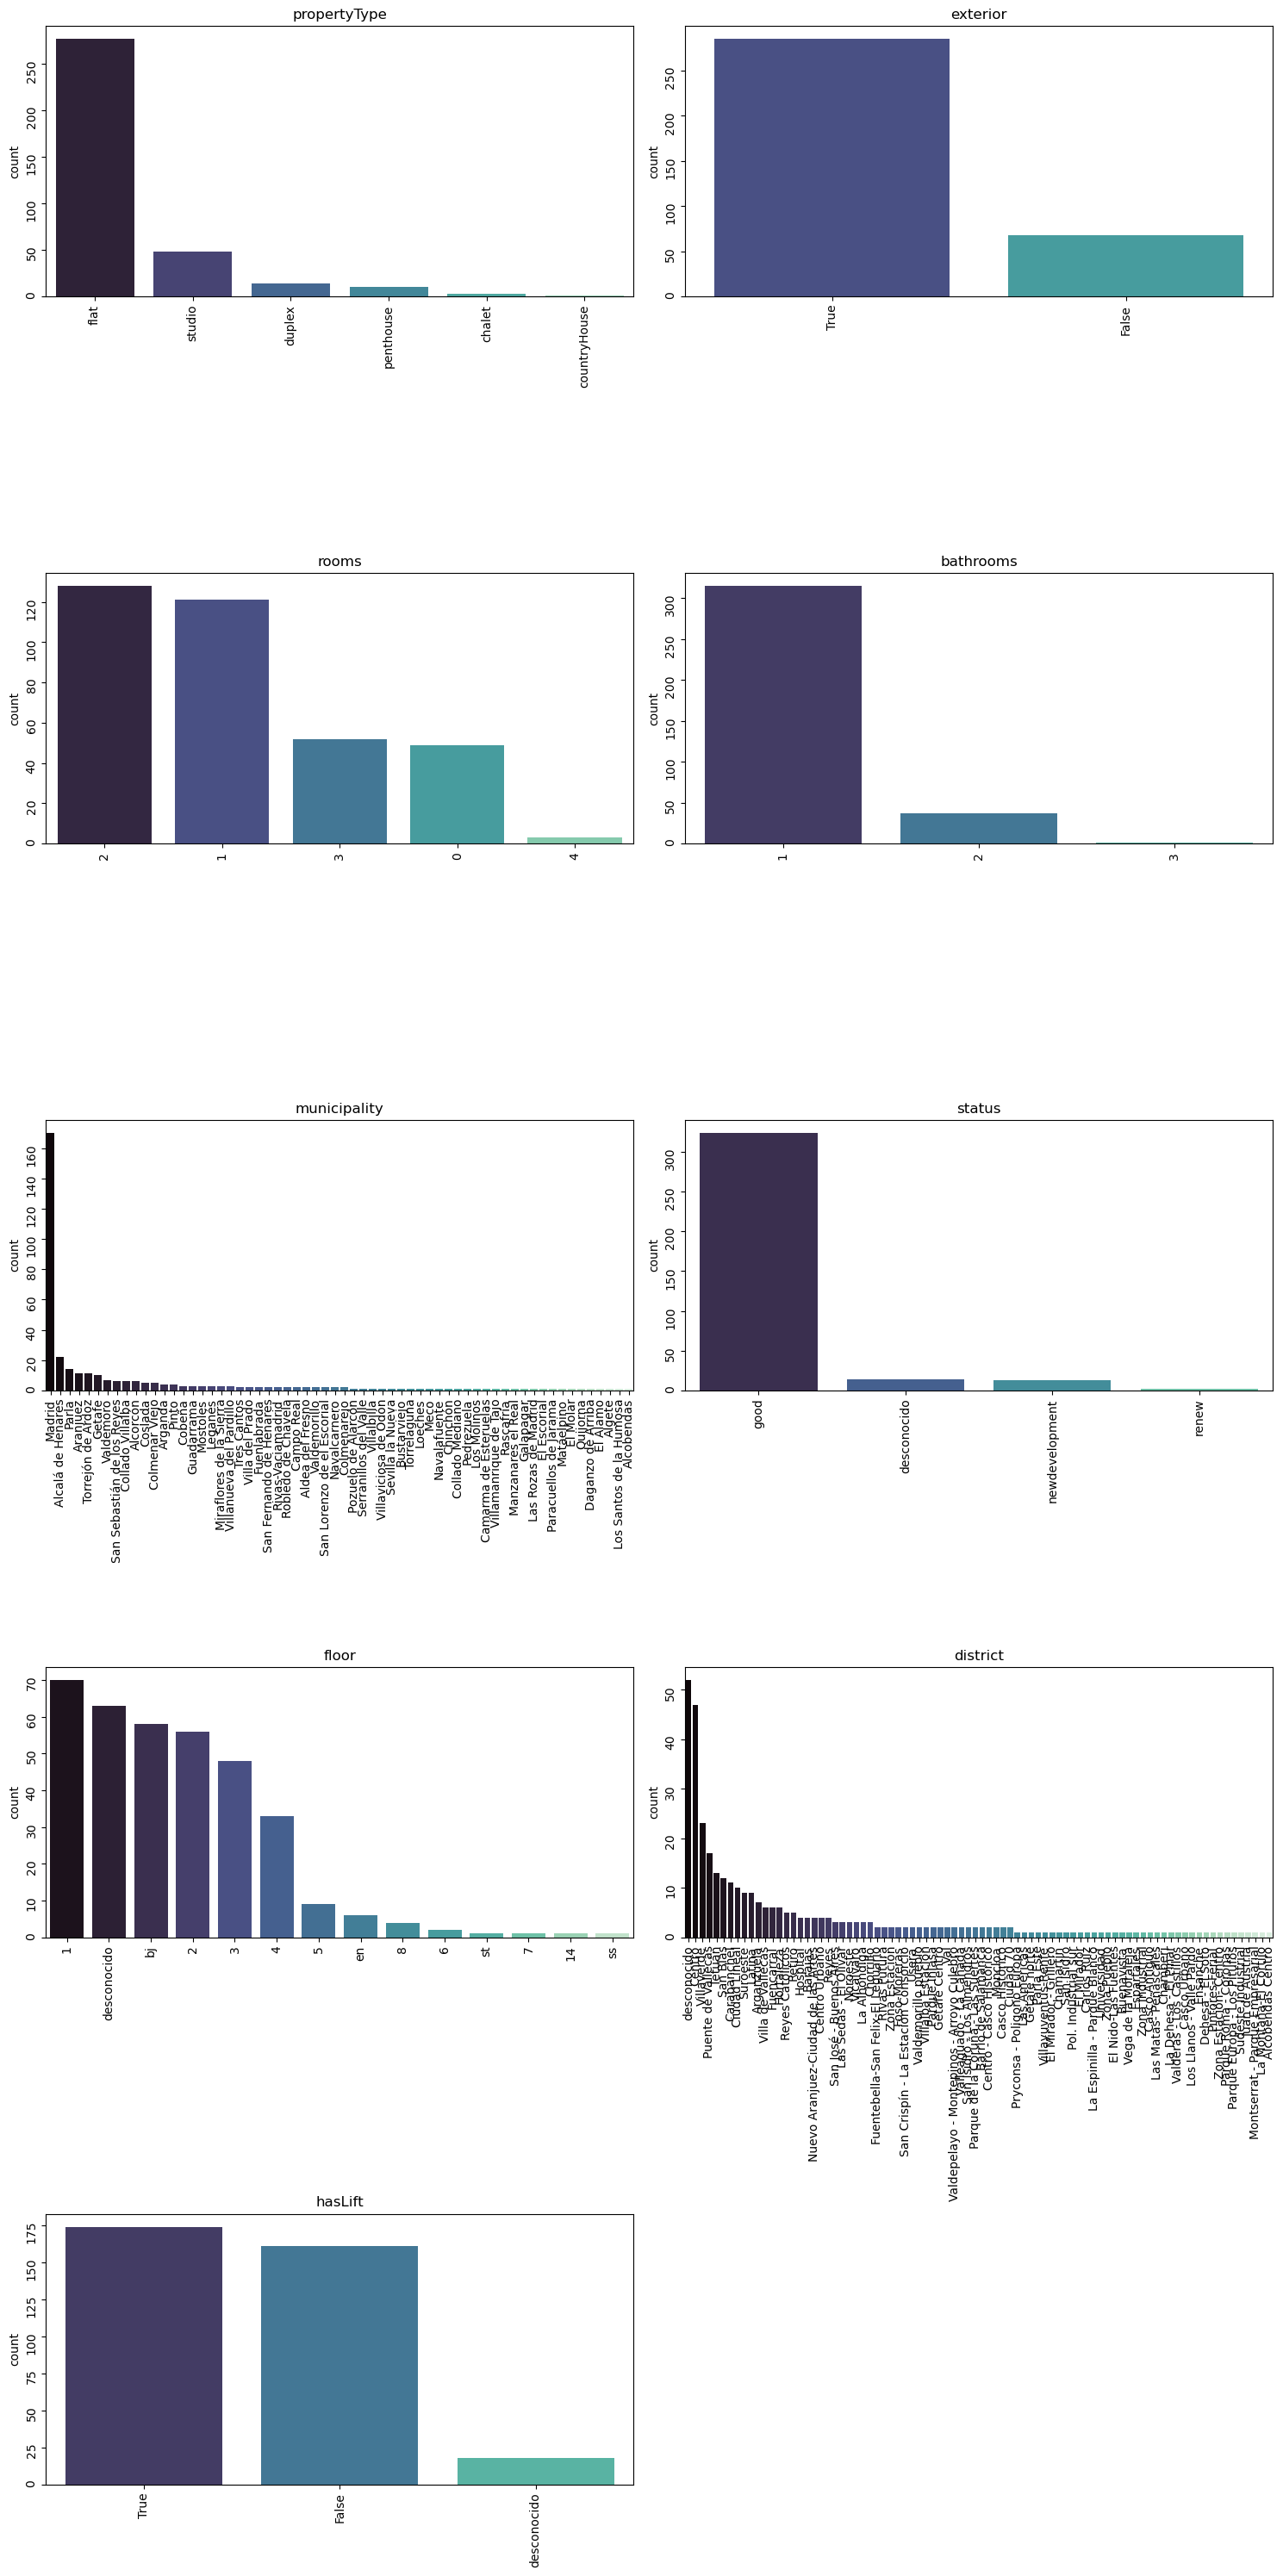

In [35]:
f.plot_categoricas(df_categoricas, (15,30))

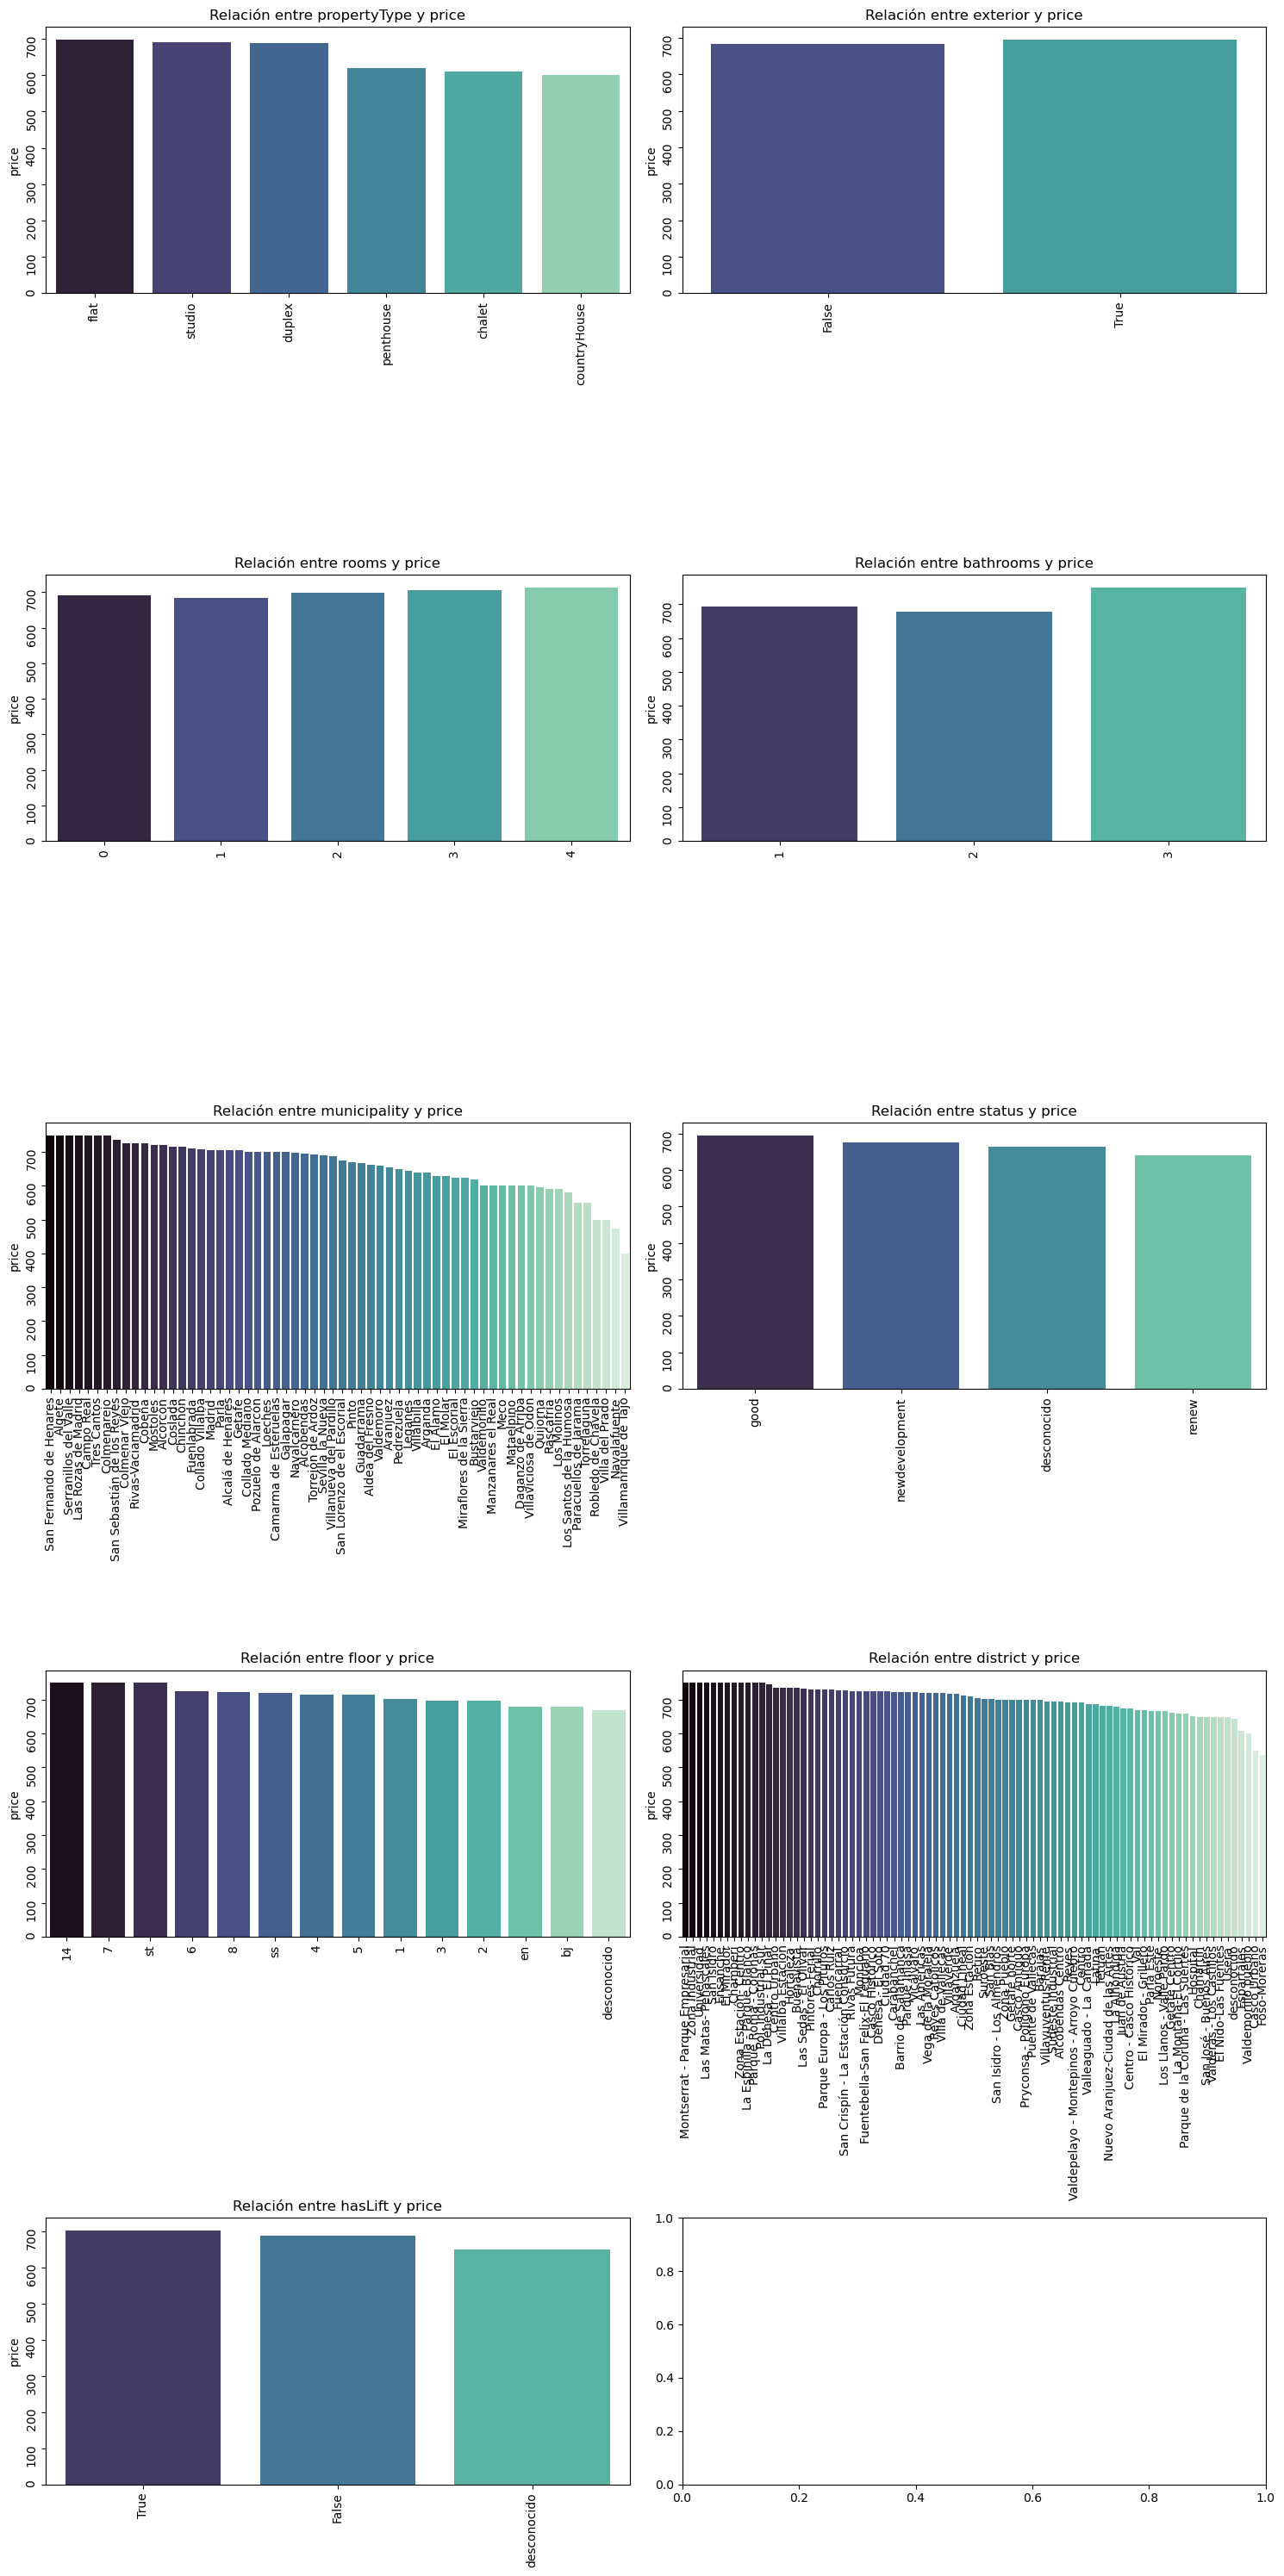

In [36]:
f.relacion_dependiente_categoricas(df_crudo, "price", (15,30))

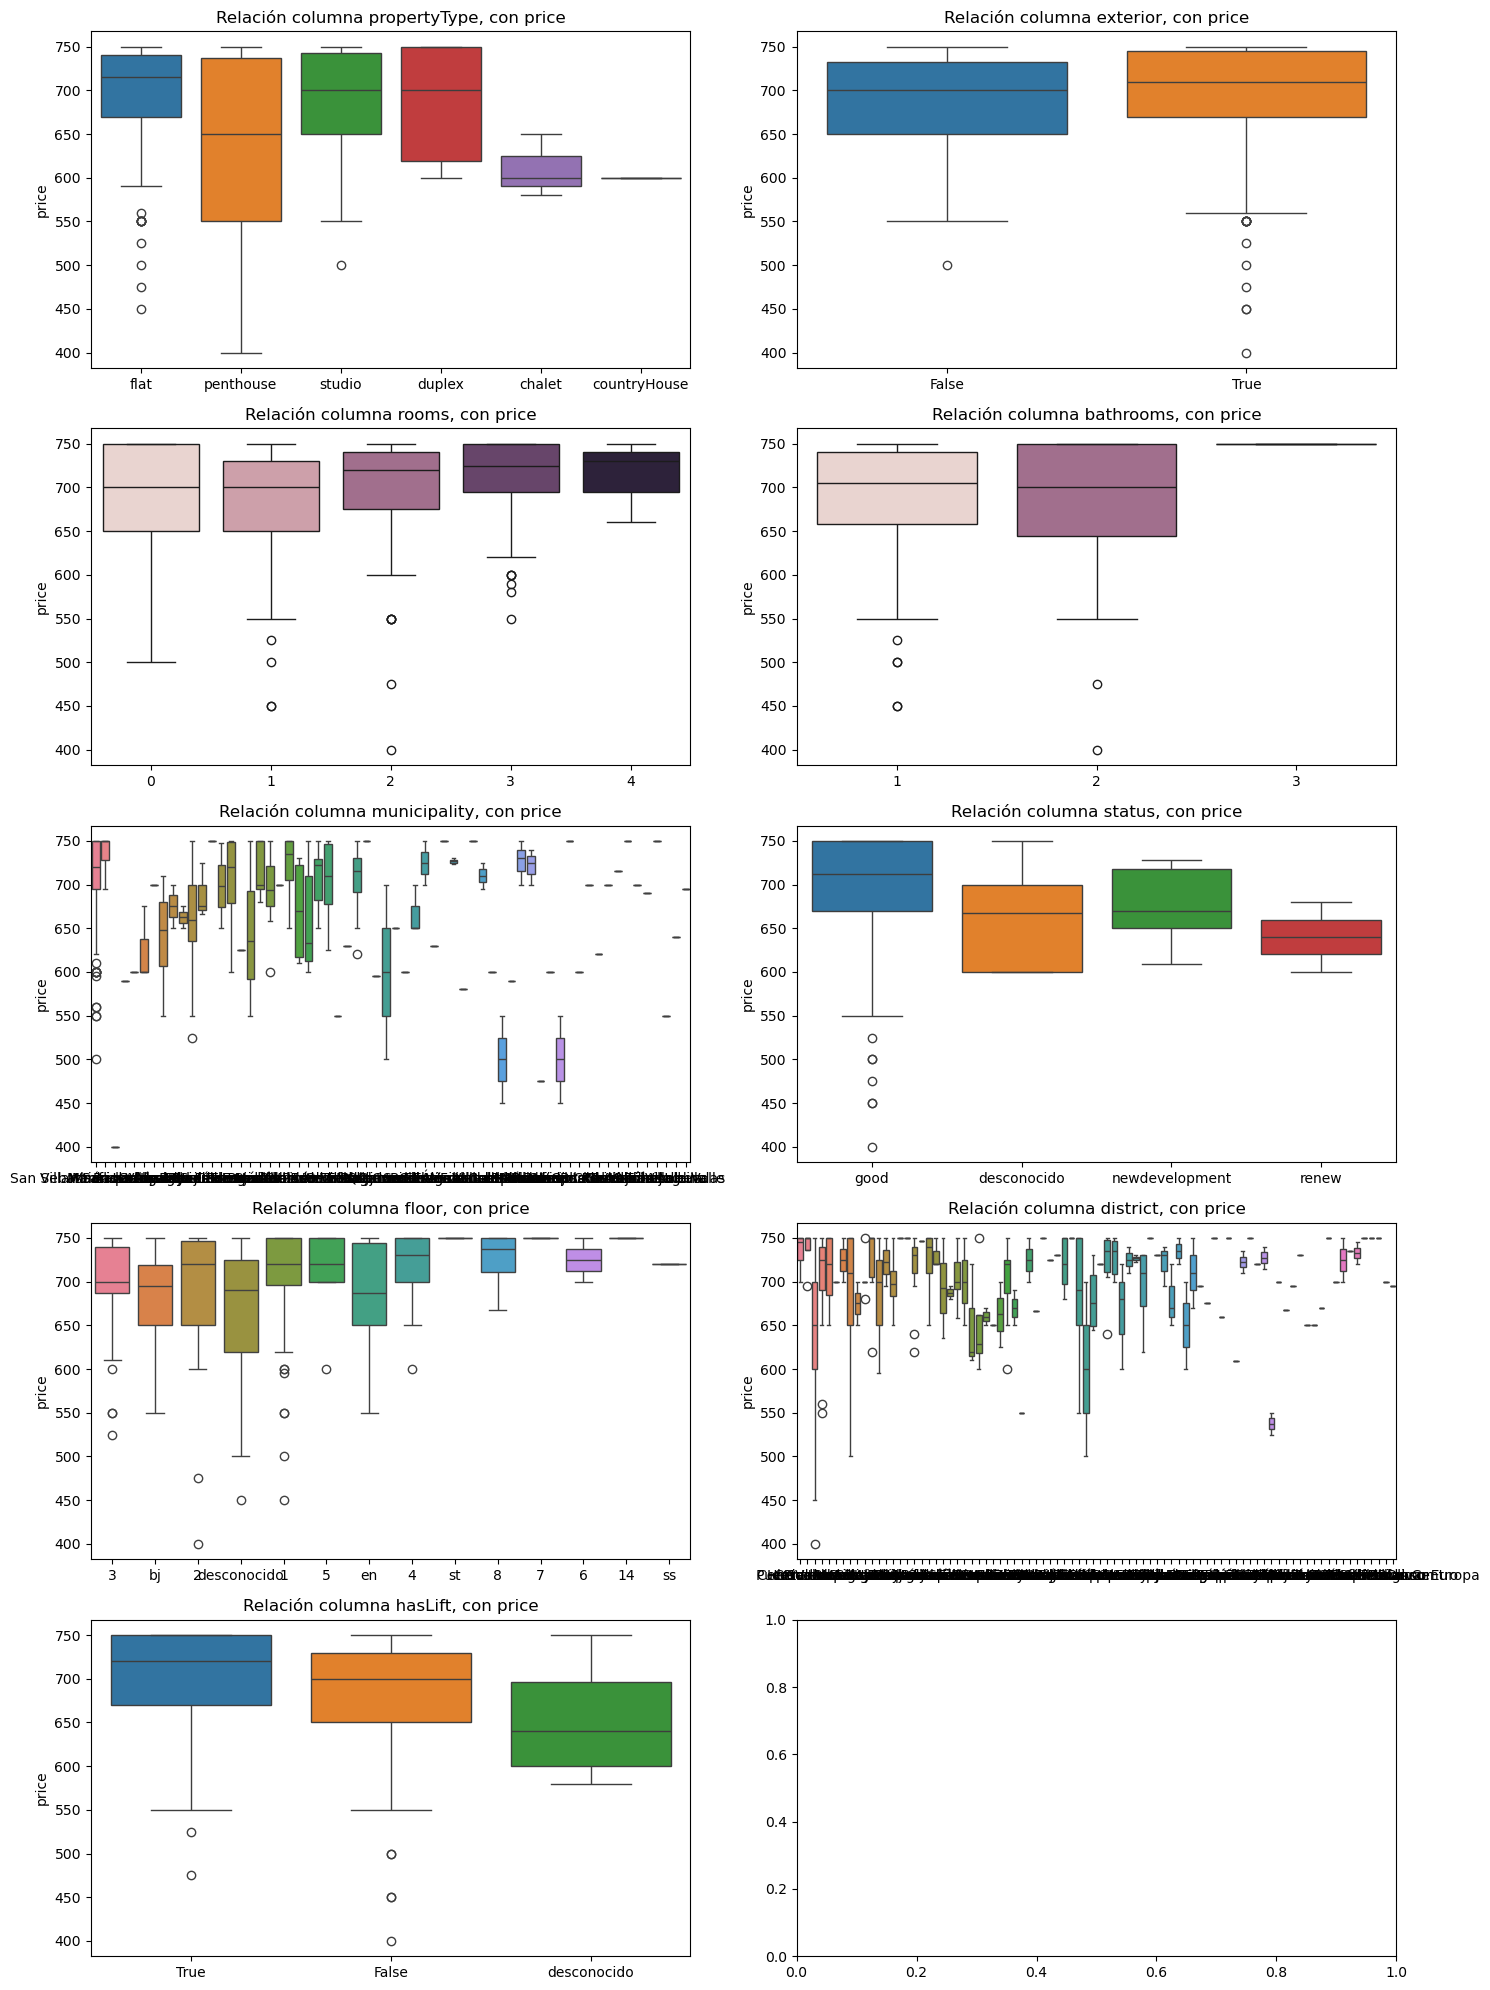

In [37]:
f.visualizar_categoricas(df_crudo, "price", (15,20))

In [38]:
df_crudo[df_crudo["price"] < 550].head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,district,hasLift
2,400.00,penthouse,67.00,True,2,2,Villamanrique de Tajo,55041,good,2,desconocido,False
47,500.00,studio,28.00,False,0,1,Madrid,769,good,1,Centro,False
94,500.00,flat,45.00,True,1,1,Valdemorillo,32188,good,desconocido,Valdemorillo pueblo,False
186,450.00,penthouse,60.00,True,1,1,Villa del Prado,53238,good,desconocido,desconocido,False
241,475.00,flat,79.00,True,2,2,Navalafuente,45077,good,2,desconocido,True


In [39]:
(df_crudo["price"] < 550).sum()

7

Separamos las viviendas más grandes del resto

In [40]:
df_crudo[df_crudo["size"] > 150].head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,district,hasLift
18,650.00,chalet,206.00,False,3,1,Aldea del Fresno,43195,good,desconocido,desconocido,desconocido
191,660.00,flat,155.00,False,3,2,Aranjuez,41119,desconocido,desconocido,desconocido,desconocido
195,660.00,flat,168.00,False,4,2,Aranjuez,41221,good,3,La Montaña-El Cortijo,True
225,730.00,flat,161.00,True,4,1,Aranjuez,44159,good,3,Nuevo Aranjuez-Ciudad de las Artes,False
248,600.00,chalet,180.00,False,3,2,Meco,35543,good,desconocido,desconocido,desconocido


In [41]:
(df_crudo["size"] > 150).sum()

5

In [42]:
df_crudo=df_crudo[df_crudo["size"] <150]

Observamos la relación con la variable dependiente

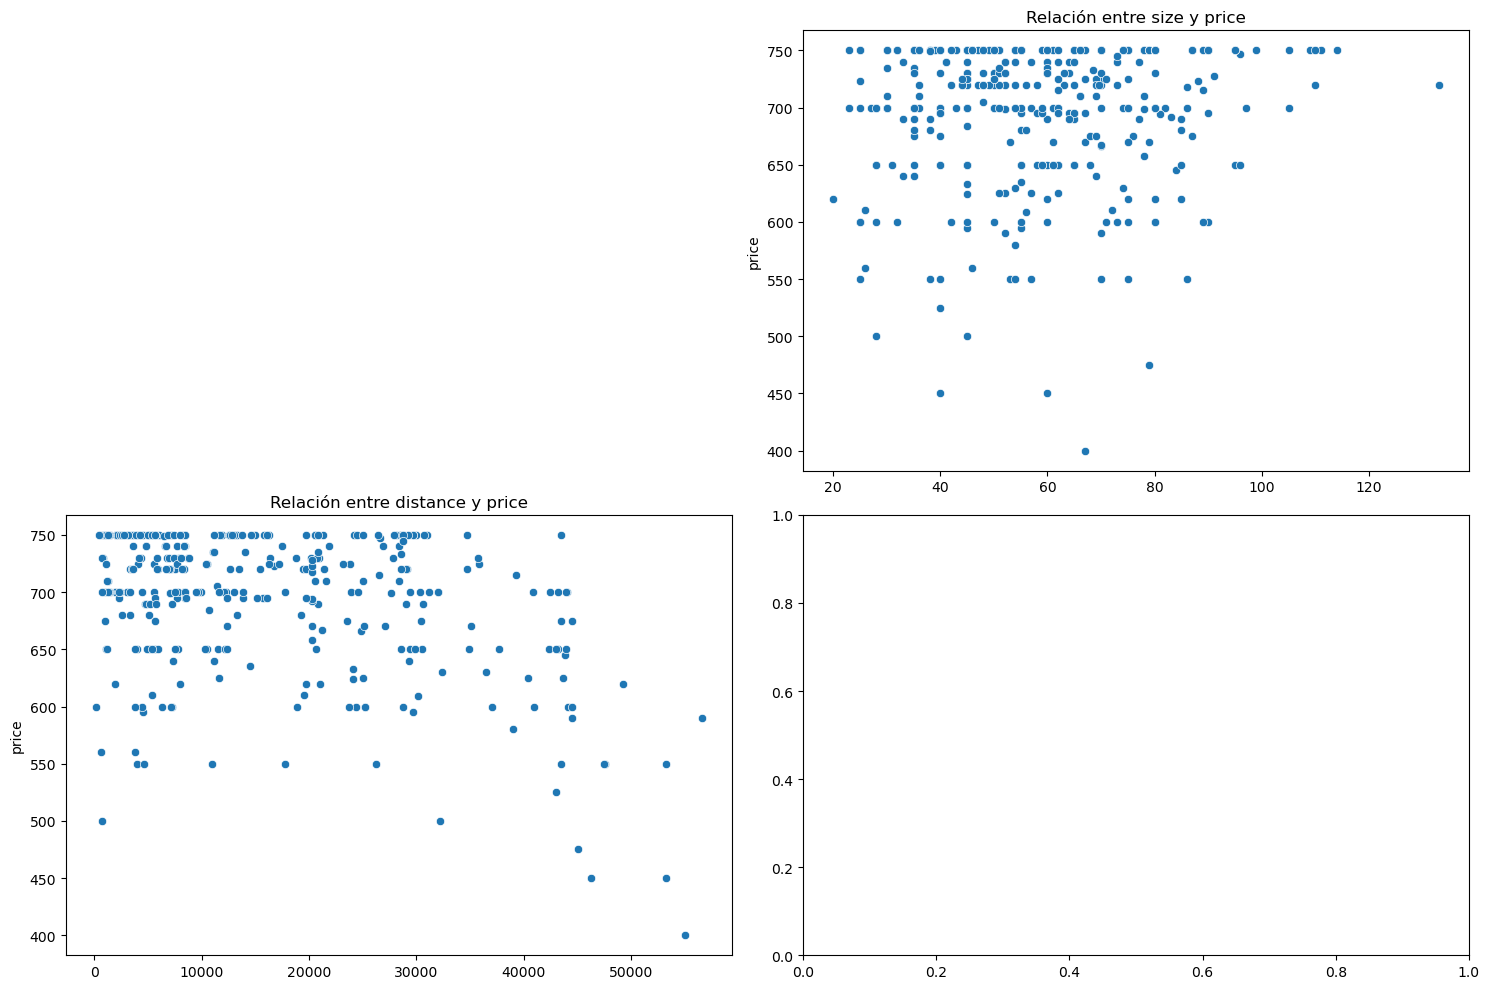

In [43]:
f.relacion_dependiente_numericas(df_crudo, "price", (15,10))

<Axes: xlabel='price', ylabel='size'>

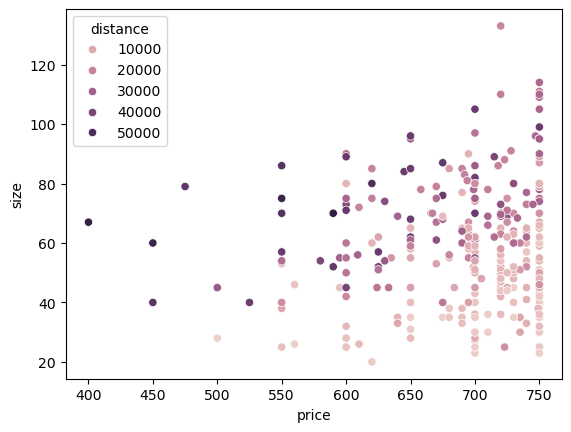

In [44]:
sns.scatterplot(x="price", y="size", hue="distance", data=df_crudo)

Se pueden intuir cierta relaciones entre las variables, pero observamos las correlaciones para confirmar. Lo que sí es bastante claro es la dirección de la relación (positiva y negativa)

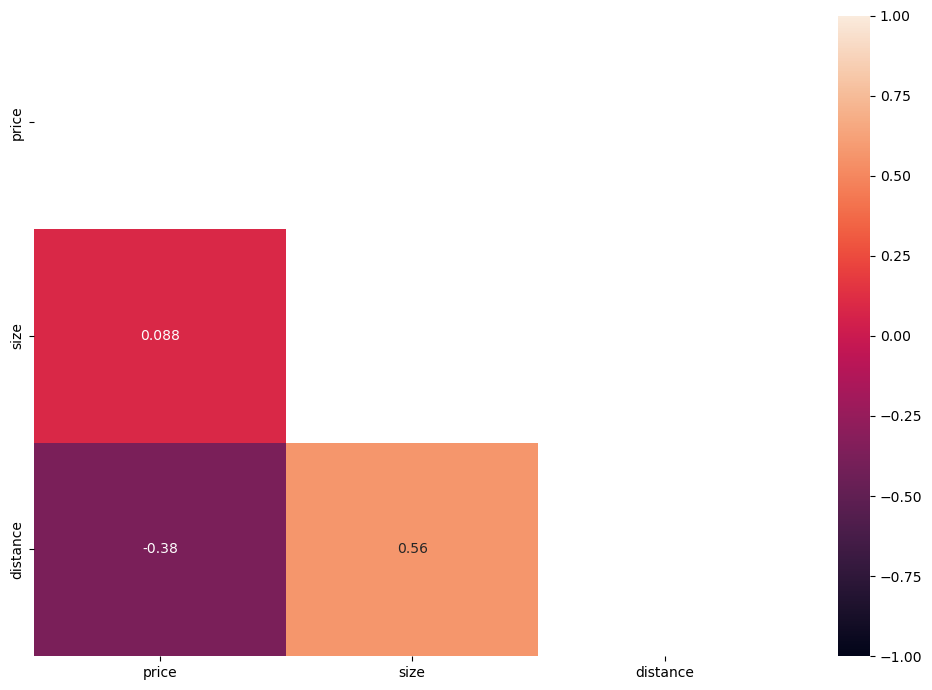

In [45]:
f.matriz_correlacion(df_crudo)

Observamos una relación moderada entre price y distance y apenas correlación con el tamaño. Además vemos otra relación moderada entre distance y el tamaño.

In [46]:
df_crudo.to_csv("../../datos/datos4/datos_sin_nulos.csv")